In [6]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
# Reading dataset
data=pd.read_csv('UCI_Credit_Card.csv')

In [62]:
# First look of data
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [63]:
# Cleaning data

# Drop ID as it is of no use
data=data.drop('ID',axis=1)

# Split df into X and y
y = data['default.payment.next.month']
X = data.drop('default.payment.next.month', axis=1)

# Scale X with a standard scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [64]:
# Splitting into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

In [65]:
type(X_train)

pandas.core.frame.DataFrame

In [66]:
# Converting pandas dataframe to numpy array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

type(X_train)

numpy.ndarray

In [67]:
# Reshaping numpy array
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (23, 22500)
Shape of y_train :  (1, 22500)
Shape of X_test :  (23, 7500)
Shape of y_test :  (1, 7500)


In [68]:
# sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [69]:
# Logistic regression model
def model(X, y, learning_rate, iterations):
    
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-y, X.T)
        dB = (1/m)*np.sum(A - y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [86]:
iterations = 5000
learning_rate = 0.005
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  500 iteration is :  0.5407276650466175
cost after  1000 iteration is :  0.4981667099706971
cost after  1500 iteration is :  0.48127118607258135
cost after  2000 iteration is :  0.4736362873985888
cost after  2500 iteration is :  0.4698364036421219
cost after  3000 iteration is :  0.46779707376524343
cost after  3500 iteration is :  0.4666342326746132
cost after  4000 iteration is :  0.4659371602051183
cost after  4500 iteration is :  0.46550121966068475


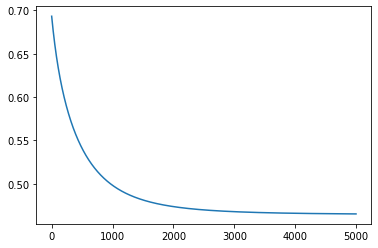

In [87]:
# Plotting graph to see if Cost Function is decreasing or not
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [88]:
# Accuracy Function
def accuracy(X, y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - y))/y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [89]:
# Testing Model Accuracy
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  80.6 %
